Decision Tree Regression: Originally for Piceance Manocs, but can be used for multiple analysis types.

Load programs required for analysis.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import dtreeviz
from dtreeviz.trees import *
#Try and troubleshoot dtreeviz issues by mapping path:
#import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/Tyler Peters/Graphviz-12.1.0-win32/bin/'

This analysis will use decision tree regression to estimate EUR by using geological and reservoir parameters.
Let's load and look at the data.

In [2]:
file_name="ENV_DECISION_TREE_REGRESSION.csv"
data= pd.read_csv(file_name)
data.shape


(3847, 12)

In [3]:
data

,API_UWI,WellName,ENVSpacingAssumption,TVD_FT,Vintage,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,Proppant_LBS,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,EURWH_BCF_360
0,17-081-21458,HA RA SUG;BLOUNT 2&11-14-12 HC 002-ALT,1216.0,11972.0,2015,5105.0,0.96,1487.0,7574250.0,187970.0,37.0,8.6
1,17-085-22429,HA RA SUS;GARY LEE 8 001,1179.0,12778.0,2014,4893.0,1.16,2193.0,9844369.0,202107.0,45.0,3.7
2,17-013-22176,HA RA SUW;WAITES 4 H 002-ALT,836.0,12147.0,2019,4598.0,0.99,4232.0,18944640.0,454184.0,101.0,5.1
3,17-081-21665,HA RA SUK;SAMPLE 3-14-11 H 003-ALT,857.0,12139.0,2020,4581.0,NaN,NaN,NaN,458920.0,102.0,11.2
4,17-017-36541,HA RA SU137;LAZARD 12&1&36 H 002-ALT,1052.0,11111.0,2022,11174.0,1.14,6019.0,66655416.0,1393490.0,126.0,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...
3842,42-203-35504,FLOYD-HOPE (AW) 2H,890.0,11190.0,2022,8700.0,1.01,4149.0,35404887.0,838142.0,98.0,7.8
3843,42-365-38033,"EVANS, CORNELIUS 11H",2212.0,10765.0,2014,3828.0,0.47,2588.0,10001300.0,501880.0,130.0,5.7
3844,42-405-30619,MINERS B 3SL,1288.0,14004.0,2018,7442.0,NaN,2199.0,16491688.0,NaN,NaN,14.2
3845,42-203-35494,LAWLESS GU 2H,906.0,11137.0,2022,11387.0,1.05,4212.0,46872090.0,1060079.0,95.0,18.4


Find missing data

In [4]:
data.isna().sum()

API_UWI                         0
WellName                        0
ENVSpacingAssumption          301
TVD_FT                          1
Vintage                         0
LateralLength_FT              143
ProppantLoading_LBSPerGAL     795
ProppantIntensity_LBSPerFT    728
Proppant_LBS                  707
TotalFluidPumped_BBL          533
FluidIntensity_BBLPerFT       536
EURWH_BCF_360                 327
dtype: int64

Drop rows with NA values.

In [5]:
#Skip this step IF important variables are all full
data.dropna(inplace=True)
data.shape

(2778, 12)

Split dataset into target and features

In [6]:
X=data.drop(columns=['API_UWI','WellName','EURWH_BCF_360'])
Y=data['EURWH_BCF_360']

In [7]:
X.head()

,ENVSpacingAssumption,TVD_FT,Vintage,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,Proppant_LBS,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT
0,1216.0,11972.0,2015,5105.0,0.96,1487.0,7574250.0,187970.0,37.0
1,1179.0,12778.0,2014,4893.0,1.16,2193.0,9844369.0,202107.0,45.0
2,836.0,12147.0,2019,4598.0,0.99,4232.0,18944640.0,454184.0,101.0
4,1052.0,11111.0,2022,11174.0,1.14,6019.0,66655416.0,1393490.0,126.0
5,631.0,11874.0,2022,6659.0,1.08,3941.0,25768250.0,569761.0,87.0


Understand and correct data types

In [8]:
Y.head()

0     8.6
1     3.7
2     5.1
4    22.7
5    16.2
Name: EURWH_BCF_360, dtype: float64

In [9]:
X.dtypes

ENVSpacingAssumption          float64
TVD_FT                        float64
Vintage                         int64
LateralLength_FT              float64
ProppantLoading_LBSPerGAL     float64
ProppantIntensity_LBSPerFT    float64
Proppant_LBS                  float64
TotalFluidPumped_BBL          float64
FluidIntensity_BBLPerFT       float64
dtype: object

Format datatypes as needed

In [10]:
#X['FirstProdDate']=X['FirstProdDate'].astype(str)
#X.dtypes

In [11]:
X.head()

,ENVSpacingAssumption,TVD_FT,Vintage,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,Proppant_LBS,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT
0,1216.0,11972.0,2015,5105.0,0.96,1487.0,7574250.0,187970.0,37.0
1,1179.0,12778.0,2014,4893.0,1.16,2193.0,9844369.0,202107.0,45.0
2,836.0,12147.0,2019,4598.0,0.99,4232.0,18944640.0,454184.0,101.0
4,1052.0,11111.0,2022,11174.0,1.14,6019.0,66655416.0,1393490.0,126.0
5,631.0,11874.0,2022,6659.0,1.08,3941.0,25768250.0,569761.0,87.0


Split into test and train datasets.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

Create a regression tree.

In [13]:
regression_tree=DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

Training

In [14]:
regression_tree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

Evaluate the model with an R2 value.

In [15]:
regression_tree.score(X_test,Y_test)

0.3791784815437085

Find the average error in testing set.

In [16]:
prediction=regression_tree.predict(X_test)
print((prediction - Y_test).abs().mean()*1000)

2991.888124338691


Plot the decision tree

[Text(0.5, 0.9, 'LateralLength_FT <= 6581.5\nfriedman_mse = 30.451\nsamples = 2222\nvalue = 12.147'),
 Text(0.25, 0.7, 'Proppant_LBS <= 12577611.0\nfriedman_mse = 10.501\nsamples = 681\nvalue = 8.006'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'TVD_FT <= 11020.5\nfriedman_mse = 4.455\nsamples = 251\nvalue = 6.113'),
 Text(0.0625, 0.3, 'TVD_FT <= 10710.5\nfriedman_mse = 1.227\nsamples = 44\nvalue = 3.934'),
 Text(0.03125, 0.1, 'friedman_mse = 0.862\nsamples = 29\nvalue = 3.548'),
 Text(0.09375, 0.1, 'friedman_mse = 1.087\nsamples = 15\nvalue = 4.68'),
 Text(0.1875, 0.3, 'TotalFluidPumped_BBL <= 126481.5\nfriedman_mse = 3.917\nsamples = 207\nvalue = 6.576'),
 Text(0.15625, 0.1, 'friedman_mse = 2.845\nsamples = 35\nvalue = 4.566'),
 Text(0.21875, 0.1, 'friedman_mse = 3.146\nsamples = 172\nvalue = 6.985'),
 Text(0.375, 0.5, 'LateralLength_FT <= 4959.0\nfriedman_mse = 10.718\nsamples = 430\nvalue = 9.111'),
 Text(0.3125, 0.3, 'ENVSpacingAssumption <= 864.0\nfriedman_mse = 6.62\nsample

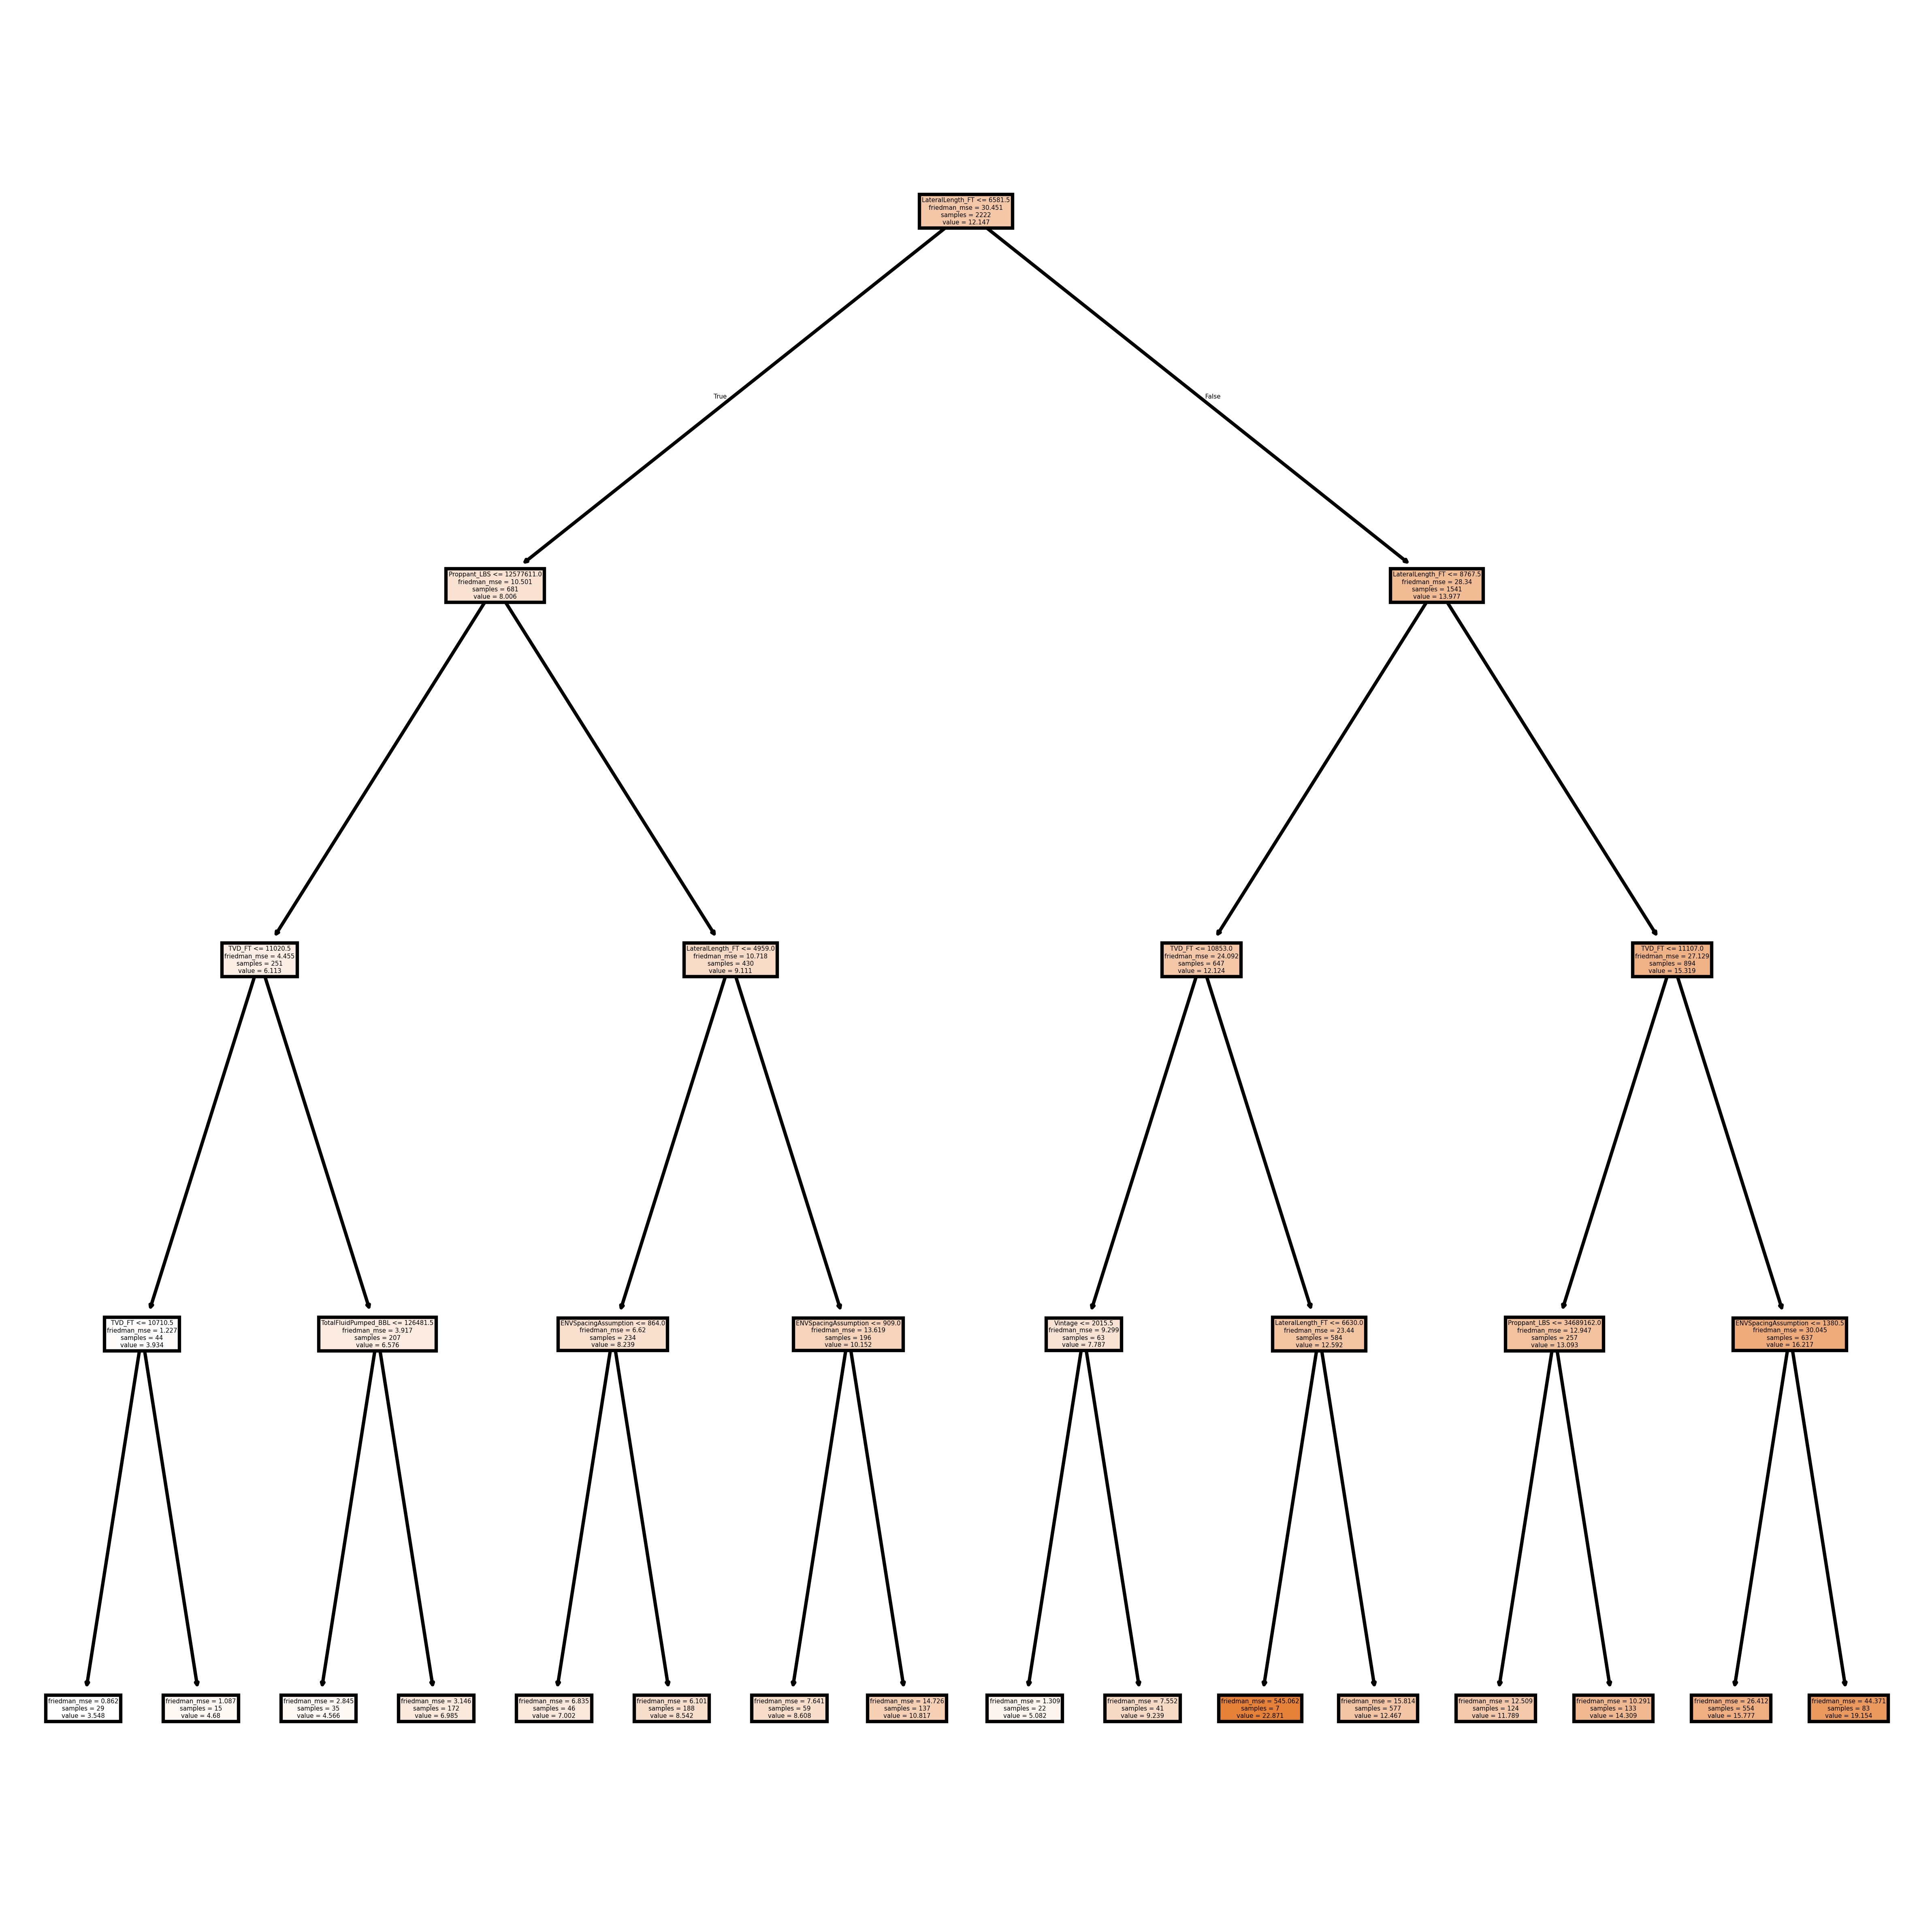

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=600)
fn=list(X)
target=list(Y)
tree.plot_tree(regression_tree, feature_names=fn, filled=True)

Visualize decision tree: dtreeviz

In [18]:
viz = dtreeviz.model(regression_tree,
                     X,
                     Y,
                    feature_names=fn,
                    target_name=target)

In [19]:
viz.view()

C:\Users\Tyler Peters\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH